<h3>Tool assisted housing prices</h3>

The goal of this notebook is to work through this project a la typical kaggle style approach with a heavy sprinkle of chatGPT's help.
The primary objective is to use chatGPT as a tool.
Some possible questions to answer at the end:

    1. what problems did you have using chatgpt
    2. how did you prompt chatgpt
    3. where did you believe chatgpt helped the most in the process
    4. how would you rate chatgpt's effectiveness in its answers

Below is a list of tasks to accomplish.
I want chatGPT to assist in each of the tasks.
I'll document my prompts (somehow, no idea yet) and answers:

    1. Data setup
    2. EDA
    3. Pipeline
    4. Modeling
    5. Feature engineering
    6. Ensemble

In [1]:
import pandas as pd
from IPython.display import display, HTML # This import comes from a chatGPT response!

In [2]:
df_train = pd.read_csv('data/train.csv')

<h5><b>Data setup and EDA</h5></b>

Ideally we use chatGPT for each step and see how far it can take us before we have to grab the steering wheel. I'm curious if I can just paste in the output table for stuff like null values and summary stats and get chatGPTs opinion on what to do next! We'll see if I can and if I agree with the results.

    Get an idea of the data, summary stats
    What do the nulls look like?
    What is the shape of the data?
    May be worth splitting up a view for numerics and categoricals


In [3]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Upon using `df_train.describe()` I am met with a monstrous table display.
We'll use chatgpt to circumvent this.
I'll upload a link to the chat for those interested.

So my first prompt was:
We're doing some analysis with python inside of a jupyter notebook. Can you create a way to view tables in a more concise manner?

    It gave me useful info as far as installing pandas goes but doesn't quite give me what I want.

The second prompt:
I already have pandas, thanks. I would like my tables in the output to be more concise. Can you help me out with that?

    This one was more precise. It showed me how I can change my max_rows, max_columns, max_colwidth, and precision but I don't want to truncate my data.

Third prompt:
I don't want to truncate my data, I would like to still view everything without it taking up a lot of space. Is there a function you can provide me to achieve this?

    This one seems interesting. I'll try it out and see what that looks like in the next block

In [4]:
# Set the display width to fit your Jupyter Notebook's cell
pd.set_option('display.width', None)

# Set the maximum number of columns to display
pd.set_option('display.max_columns', None)

# Set the maximum width for each column
pd.set_option('display.max_colwidth', None) # had to change -1 to None, chatGPT made a mistake here

# Display the DataFrame as a string without truncation
print(df_train.describe().to_string())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000 

I will say that it does look a lot more concise but it looks pretty ugly. Time to get more precise on my prompting.

4th prompt: This looks a lot better. However, I would like a function that allows me to use this each time and show case the data in scrollable html table.

    Holy smokes, it actually gave a function to use. However, at a glance I can see that I need more arguments for my use cases and it still has a -1 instead of None. Before we use this let's see if chatGPT can fix that mistake after I mention it and allow for more inputs.

5th prompt: Thanks! I noticed that the -1 for pd.set_option results in this error: ValueError: Value must be a nonnegative integer or None.
Can you fix that value error and allow for more inputs such as table name and table ID

    I'm honestly blown away with the response this one gave me. It even goes as far as how to use it and why my extra inputs are useful. Cool. Not sure I like the 1000 in place of -1, I'll stick with None for now. Tool assisted, I still gotta put in work here.

In [5]:
# Lets see this chatGPT code in action


def display_scrollable_table(df, table_name=None, table_id=None):
    # Set the display width to fit your Jupyter Notebook's cell
    pd.set_option('display.width', None)

    # Set the maximum number of columns to display
    pd.set_option('display.max_columns', None)

    # Set a large positive value for column width to prevent truncation
    pd.set_option('display.max_colwidth', None) # NOTE: Like I mentioned I prefer None over 1000, changed

    # Generate HTML table
    html_table = df.to_html(index=True, classes='scrollable-table', table_id=table_id) # NOTE: The index being false is a no go for me, changed

    # Create HTML with styling and scrollable container
    html = f"""
    <div style="overflow-x: auto;">
        <h4>{table_name}</h4>
        {html_table}
    </div>
    """

    # Display the HTML table
    display(HTML(html))

In [6]:
display_scrollable_table(df_train.describe().T, "Summary Stats")

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


Okay, so my last prompt on this function: Good work, can we make the window size smaller and scrollable both horizontally and vertically?

    Chatgpt gives me some extra inputs to customize the size of the output window. It gave me 300px on height by default and 100% on width by default. I'll iterate on the next cell block to find what works best for me

In [7]:
def display_scrollable_table(df, table_name=None, table_id=None, width='75%', height='300px'):
    # Set the display width to fit your Jupyter Notebook's cell
    pd.set_option('display.width', None)

    # Set the maximum number of columns to display
    pd.set_option('display.max_columns', None)

    # Set a large positive value for column width to prevent truncation
    pd.set_option('display.max_colwidth', None) # NOTE: again I needed to change this to None but its nice to see that it kept it in the conversation

    # Generate HTML table
    html_table = df.to_html(index=True, classes='scrollable-table', table_id=table_id) # NOTE: same change on index being true here. I didn't mention it in the prompt

    # Create HTML with styling and scrollable container
    html = f"""
    <div style="width: {width}; height: {height}; overflow: auto;">
        <h4>{table_name}</h4>
        {html_table}
    </div>
    """

    # Display the HTML table
    display(HTML(html))


In [8]:
display_scrollable_table(df_train.describe(), "Summary Stats")
display_scrollable_table(df_train.describe().T, "Summary Stats")

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


Hey this is great, I set the column to 75% since I don't want to look at the extreme right of my screen. The 300px works great for me. Good work chatGPT. I should consider using co-pilot as well for all the tool assisted help.

I think I've digressed far enough on this unimportant function but it was neat to see how chatGPT and I could iterate on this. Next I want to feed in the summary stats output after I talk about the purpose of this project.

<h5><b>IDEA: Create a "small" app that sends the same prompt to Bard, co-pilot, chatgpt and returns their results (possibly any other LLMs as well).

Prompt: To give you more background on this project I want to use the data from kaggle's housing prices and run through a typical data science pipeline using your help! The goal of this dataset is to predict the sales price. Here is a link to those datasets: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

What are some things we should look for in our data exploration analysis? 

    This was the output!

Exploring the data is an essential step in any data science pipeline. It helps you understand the characteristics of the dataset, identify patterns, and gain insights that can guide your subsequent analysis and modeling. Here are some key aspects to consider during your data exploration analysis for the Kaggle House Prices dataset:

1. **Data Overview**: Begin by loading the dataset and obtaining a high-level understanding of its structure. Explore the dimensions (number of rows and columns) of the dataset and review the available features (columns) and their data types.

2. **Target Variable**: In this case, the target variable is the "SalePrice" column. Examine its distribution to understand its range, skewness, and potential outliers. Plotting a histogram or a box plot can provide initial insights into the distribution of the target variable.

3. **Feature Analysis**: Explore each feature (column) in the dataset to understand its nature and relationship with the target variable. Consider the following:

   - **Numerical Features**: Analyze numerical features such as "GrLivArea," "LotArea," "OverallQual," etc. Examine their distributions, identify outliers, and check for any potential correlations with the target variable.
   
   - **Categorical Features**: Investigate categorical features like "MSZoning," "Neighborhood," "Exterior1st," etc. Evaluate their unique categories, frequency distributions, and potential impact on the target variable.
   
   - **Missing Values**: Identify any missing values in the dataset and determine the extent of missingness for each feature. Analyze the potential reasons behind missing values and decide how to handle them in subsequent steps.

4. **Correlations**: Calculate the correlation between the numerical features and the target variable. Identify features that have a strong positive or negative correlation, as they may be good predictors of the target variable. Visualize the correlations using a correlation matrix or a heatmap.

5. **Feature Relationships**: Examine the relationships between different features. Look for potential correlations or dependencies between features that can aid in feature selection or engineering. Scatter plots, pair plots, or other visualizations can be helpful for this analysis.

6. **Outliers**: Identify any outliers in the dataset. Determine whether these outliers are erroneous data points or represent genuine observations. Depending on the nature of the outliers, decide whether to remove or transform them.

7. **Data Preprocessing**: Based on your analysis, determine the appropriate preprocessing steps for the dataset. This may include handling missing values, encoding categorical variables, scaling numerical features, or applying transformations to skewed data.

These are some initial aspects to consider during your data exploration analysis. As you delve deeper into the dataset, additional questions and insights may arise. Remember to document your observations, as they will guide your subsequent data cleaning, feature engineering, and modeling steps.

<h1>Holy shit.</h1>

It was able to list out a general outline of what I need to do first. Seems like I skipped some steps in my overview! Tool assitant already putting in work.
ChatGPT even knows what the target variable is, whether it knew through its own training data or actually read through the link, idk. But it also gave me some good ideas that I wasn't about to consider due to my laziness, such as skewnewss, outliers, even plotting a distribution to determine how normal it is. Seems I'll need to pull some memories from my stat classes! This is good though, and I'll see if chatGPT can help me in each of these steps. This notebook is about to get really long.

At least I got number 3 on point. Split up the objects/numerics and look at null values.
Correlations is definitely a good idea. The outliers part is good too, we'll have to plot some data and get a basic idea of how linear everything is, or isn't. Some of these later steps are what I would consider feature engineering so I may skip those parts until we get to that point. Anyway, I'll run through the basic steps like shape and describe and send that to chatGPT. Then we'll ask about bullets 2 and 3.

In [9]:
display(df_train.shape)
display_scrollable_table(df_train.describe().T, "Summary Stats")

(1460, 81)

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


Prompt: We'll refer back to that in a bit. What insights can you give me based on the shape of the data being (1460, 81) and the summary stats being: [plugged in the output from above]

    I'll just paste what it gave. Pretty cool

Based on the shape of the data being (1460, 81) and the summary statistics you provided, here are some initial insights:

1. **Dataset Size**: The dataset contains 1,460 instances (rows) and 81 features (columns). This indicates a relatively moderate-sized dataset with a considerable number of features to work with.

2. **Target Variable (SalePrice)**:
   - The target variable, "SalePrice," has a mean of approximately 180,921.20 with a standard deviation of 79,442.50. This indicates some variability in the sale prices of the houses.
   - The minimum sale price is 34,900, while the maximum sale price is 755,000.
   - The distribution of the target variable can provide insights into the range and spread of house prices.

3. **Numerical Features**:
   - The dataset contains various numerical features, such as "LotFrontage," "LotArea," "OverallQual," "OverallCond," "YearBuilt," etc.
   - These features exhibit different ranges, distributions, and scales. Analyzing their summary statistics can provide a sense of their distributions and potential outliers.

4. **Missing Values**:
   - Some features, such as "LotFrontage," "MasVnrArea," and "GarageYrBlt," have missing values as indicated by the difference between the count of instances and the expected count (1460).
   - Identifying and handling missing values is crucial to ensure the quality and integrity of the dataset during subsequent analysis.

5. **Categorical Features**:
   - The summary statistics you provided mainly focus on numerical features. However, the dataset likely contains several categorical features as well. It is important to explore these categorical features separately to understand their unique categories, distributions, and potential relationships with the target variable.

6. **Temporal Features**:
   - Features such as "YearBuilt," "YearRemodAdd," "GarageYrBlt," "YrSold," etc., represent temporal information related to the houses.
   - Analyzing these features can provide insights into the age of the houses, remodeling trends, and the years in which the houses were sold.

These are just initial observations based on the dataset shape and summary statistics you provided. To gain a deeper understanding of the data, it is important to visualize the distributions, explore relationships between features, handle missing values, and conduct further exploratory analysis.

In [10]:
# We'll take its advice and split the cats out and rerun the summary stats and send it back
df_train_cats = df_train.select_dtypes(include=[object])
display_scrollable_table(df_train_cats.describe().T, "Summary Stats for Categoricals")

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


Prompt: Thanks, I took your advice and reran the summary statistics for categorical variables. What insights can you give from this: [previous output]

Based on the summary statistics of the categorical variables, here are some insights:

1. **Variable Cardinality**:
   - The count column indicates the number of non-missing values for each categorical variable.
   - The unique column indicates the number of unique categories within each variable.
   - Analyzing variable cardinality helps identify the diversity and variation within categorical features.

2. **Frequent Categories**:
   - The top column represents the most frequent category within each variable, while freq indicates the frequency of occurrence for that category.
   - For example, in the "MSZoning" variable, the most common category is "RL" with a frequency of 1151.
   - Identifying the most frequent categories can provide insights into the dominant characteristics of the dataset.

3. **Missing Values**:
   - The difference between the count and the expected count (1460) can indicate missing values within categorical variables.
   - For example, the "Alley" variable has 91 non-missing values out of 1460 instances, indicating a significant number of missing values.
   - Handling missing values is crucial to ensure the quality and integrity of the dataset during analysis.

4. **Property and Neighborhood Characteristics**:
   - Categorical variables such as "LotShape," "LandContour," "Utilities," "LotConfig," "LandSlope," etc., provide information about the characteristics of the properties and their surroundings.
   - Variables like "Neighborhood" can offer insights into the different neighborhoods represented in the dataset.

5. **Building and Garage Attributes**:
   - Variables like "BldgType," "HouseStyle," "RoofStyle," "RoofMatl," "Exterior1st," "Exterior2nd," etc., describe the building and architectural attributes of the houses.
   - These variables can provide information on the style, material, and external features of the properties.

6. **Quality and Condition Ratings**:
   - Categorical variables such as "ExterQual," "ExterCond," "BsmtQual," "BsmtCond," "HeatingQC," "KitchenQual," "FireplaceQu," etc., represent quality and condition ratings of various components of the houses.
   - Analyzing these variables can help identify the distribution of ratings and their potential impact on the sale prices.

7. **Sale Details**:
   - Categorical variables like "SaleType" and "SaleCondition" provide information about the type and condition of the sale transactions.
   - Understanding the distribution of sale types and conditions can provide insights into the nature of the sales represented in the dataset.

These insights from the categorical variables can help in understanding the different attributes, characteristics, and distributions within the dataset. Further analysis can involve visualizations, exploring relationships with the target variable, handling missing values, and conducting more in-depth exploratory analysis.

    Cool now I want to go back and hit bullet point 2 on the target variable. I'd like to start visualizing some of the things chatGPT mentioned

Prompt: Awesome. Going back to your second bullet point from earlier, Target Variable, can you write me some code to visualize everything you mentioned?

    It gave me some code to visualize stuff like sales price. I'll run it in the next block after I change a few things such as the df names. I can't feed chatGPT images so no tool assist here

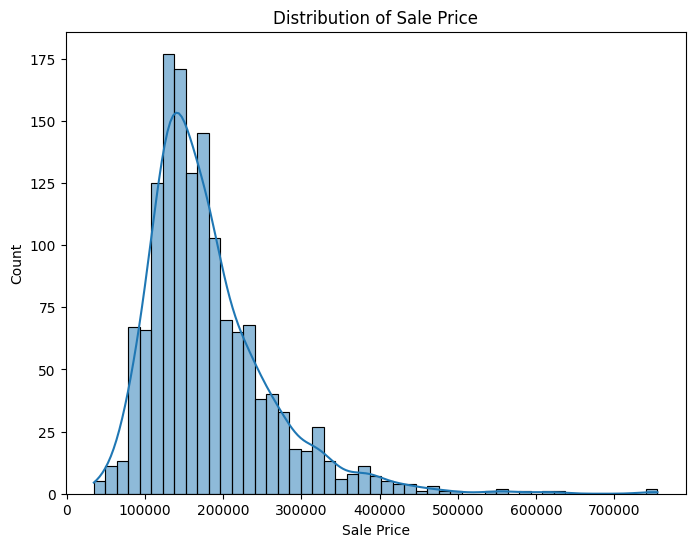

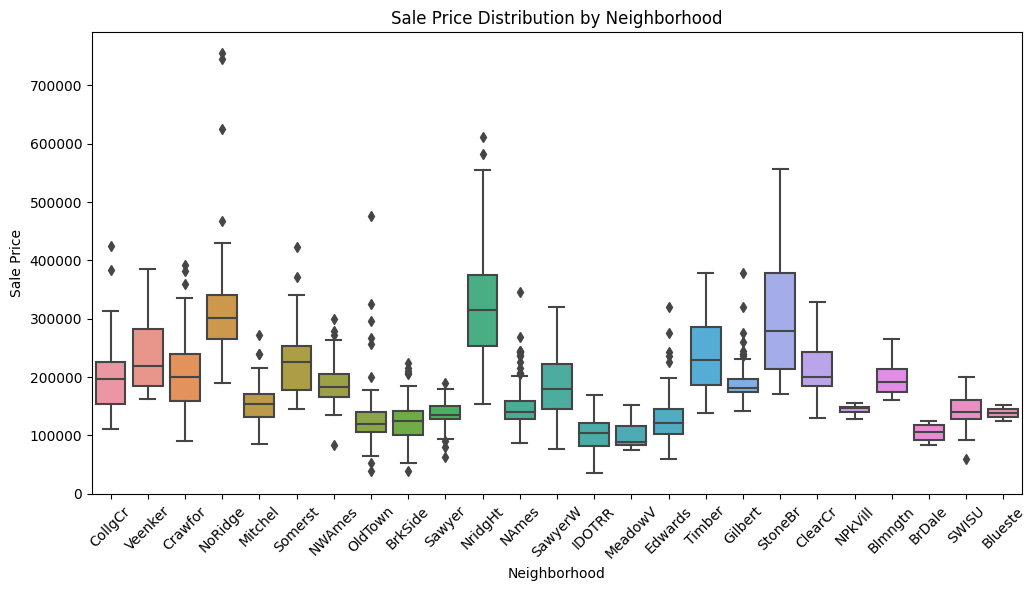

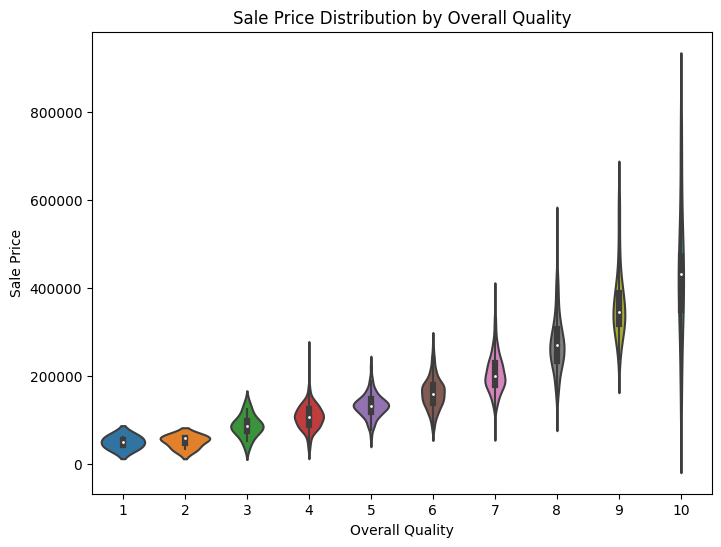

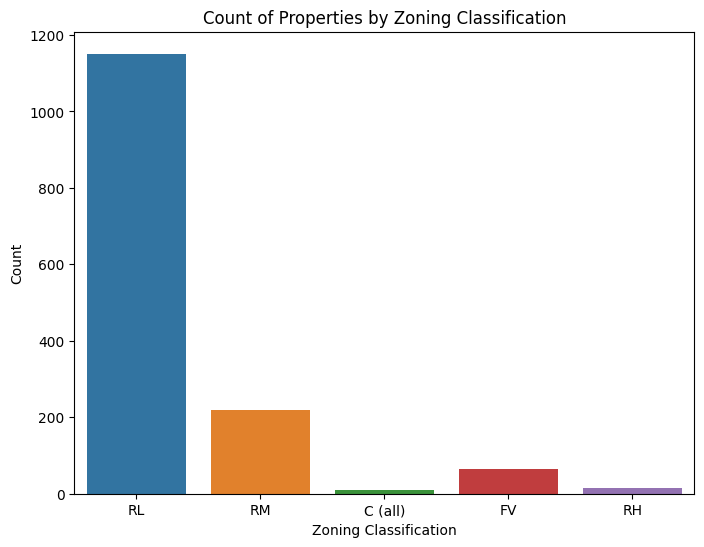

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting histogram of SalePrice
plt.figure(figsize=(8, 6))
sns.histplot(data=df_train, x='SalePrice', kde=True)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.show()

# Plotting boxplot of SalePrice by Neighborhood
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train, x='Neighborhood', y='SalePrice')
plt.title('Sale Price Distribution by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')
plt.xticks(rotation=45)
plt.show()

# Plotting violinplot of SalePrice by OverallQual
plt.figure(figsize=(8, 6))
sns.violinplot(data=df_train, x='OverallQual', y='SalePrice')
plt.title('Sale Price Distribution by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

# Plotting countplot of MSZoning
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='MSZoning')
plt.title('Count of Properties by Zoning Classification')
plt.xlabel('Zoning Classification')
plt.ylabel('Count')
plt.show()


I'll have to note here since chatGPT can't read in images (yet).

The distribution of sale price is much more prominent in the 100k-200k range (def pre covid prices)
    We'll need to fit a normal on there and run a qq plot to get more info. A good chatGPT prompt.

If I remember how to read boxplots right it appears there are a crap ton of outliers with respect to the deviation across many neighborhoods. Almost all of the outliers are above. From a gut instinct this tells me that a lot of people overestimate the sales price of their house compared to the typical pricing of similar neighborhoods. Interesting. We'd need to dig into what the neighborhood values represent, but for now we'll move on.

I'm not very familiar with violin plots so I decided to ask chatGPT this instead of googling. Remember, tool assist is the primary goal in this project.
Prompt: How do you read a violin plot?
    I won't paste its output since I'll add the chat as documentation later but based on its output I'll note what I can
So the vertical axis (literally stealing it from the output on this note) represents the range of SalePrice. The range tends to get very stretched, almost linear to exponentially over quality.
So the "bulbous" part of the violin is the most dense section for that horizontal distribution. That means while quality 10 seems to peak around ~450k it isn't too different in density when compared with its tail (at least visually). The white dots are the median. The little black box in the middle of the bulbs are like mini box plots where it represents the range of the data barring outliers. Fun fact, according to chatGPT the little lines going outside the little box are called whiskers. Cute. The black box itself represents the interquantile range (IQR) which is the central 50% of the data. Cool hope chatGPT is right, this saves me a metric ton of searching around on google and wasting time in articles that get nowhere or unanswered stacked overflow questions.

That last one shows some crazy imbalance. RL, whatever that means, absolutely dominates the other classes. NOTE: we'll want to consider this when cleaning everything up. Think of it this way if RL makes up ~80% of the data you could just only guess RL out of a mixed bag and be right ~80% of the time. We want our model to consider the minorities as well.

Prompt:
Thanks a bunch! Okay, lets dig into SalePrice a bit more.
Can you write me some code to do the following:
Fit a normal distribution on SalePrice data
Create a probability density histogram of SalePrice
Calculate the normal distribution based on your fitted parameters
Set up an overlay for the normal distribution
Combine the overlay and histogram and set up a layout for the plot
Calculate the line of best fit
Add the best fit line on a q-q plot
then update the q-q plot with a normal line
Finally, display the plots

    I practically just followed what a top 4 on the leader book's notebook did but in words so that chatGPT could create them. The problem here is that ideally chatgpt could help advise on these steps and follow through but I don't know if its quite there yet. Perhaps I am not giving it enough credit, showcasing my hesitant in trusting the big bad AI! Anyway, lets see how the output turned out.

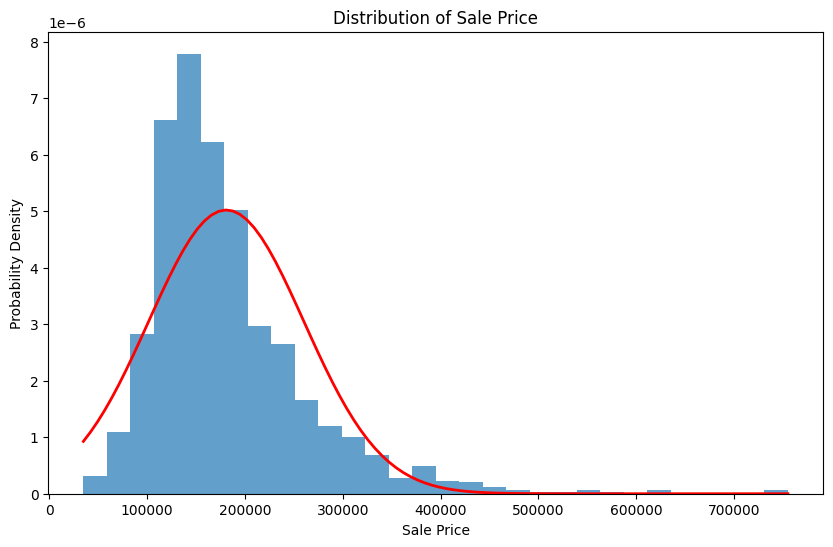

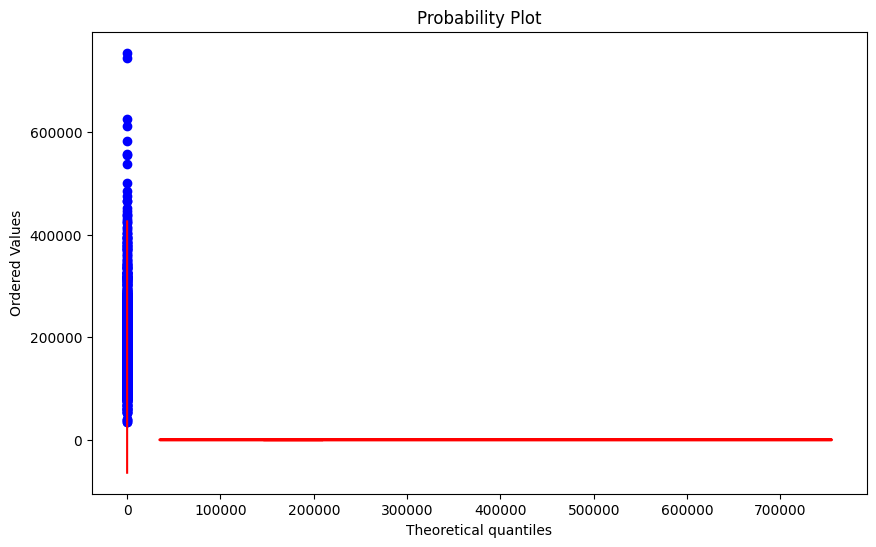

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Fit a normal distribution on SalePrice data
mu, sigma = stats.norm.fit(df_train['SalePrice'])

# Create a probability density histogram of SalePrice
plt.figure(figsize=(10, 6))
plt.hist(df_train['SalePrice'], bins=30, density=True, alpha=0.7)

# Calculate the normal distribution based on the fitted parameters
x = np.linspace(df_train['SalePrice'].min(), df_train['SalePrice'].max(), 100)
pdf = stats.norm.pdf(x, mu, sigma)

# Set up an overlay for the normal distribution
plt.plot(x, pdf, 'r-', linewidth=2)

# Set up layout for the plot
plt.xlabel('Sale Price')
plt.ylabel('Probability Density')
plt.title('Distribution of Sale Price')

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = stats.linregress(df_train['SalePrice'], df_train['OverallQual'])
line = slope * df_train['SalePrice'] + intercept

# Add the best fit line on a q-q plot
plt.figure(figsize=(10, 6))
stats.probplot(df_train['SalePrice'], dist='norm', plot=plt)

# Update the q-q plot with a normal line
plt.plot(df_train['SalePrice'], line, 'r-', linewidth=2)

# Display the plots
plt.show()


That q-q plot looks so wrong haha. That may be because I didn't say to create a q-q plot first. Hm. I'll ask it to add a legend as well

Prompt:
The q-q plot didn't look right, I added an extra step for that in the same list. 
Can you write me some code to do the following:
Fit a normal distribution on SalePrice data
Create a probability density histogram of SalePrice
Calculate the normal distribution based on your fitted parameters
Set up an overlay for the normal distribution
Combine the overlay and histogram and set up a layout for the plot
Create a Q-Q plot
Calculate the line of best fit
Add the best fit line on a q-q plot
then update the q-q plot with a normal line
Display the plots
Add legends to each plot
Finally, change the "df" inputs to "df_train"

    Lets see how this turned out!

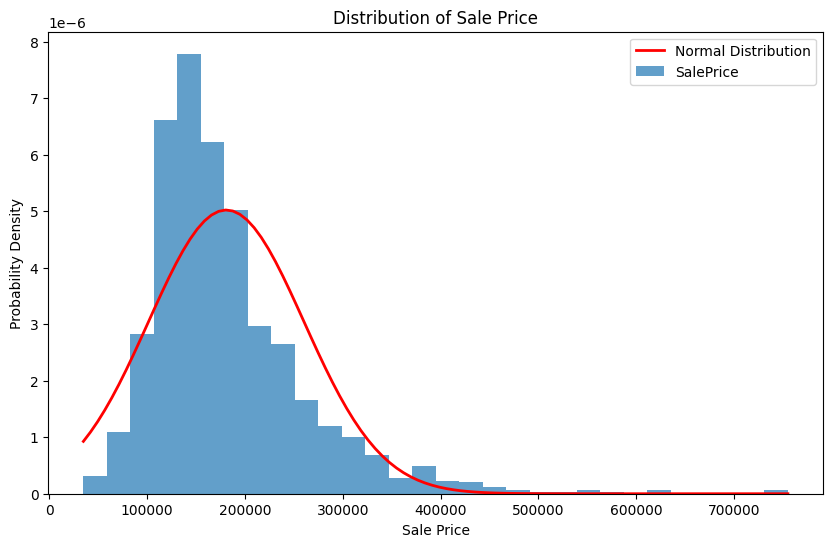

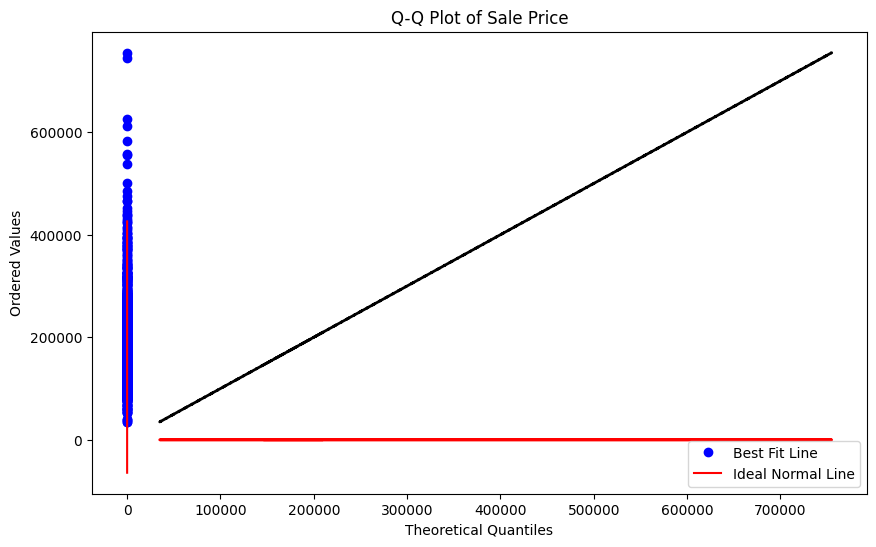

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Fit a normal distribution on SalePrice data
mu, sigma = stats.norm.fit(df_train['SalePrice'])

# Create a probability density histogram of SalePrice
plt.figure(figsize=(10, 6))
plt.hist(df_train['SalePrice'], bins=30, density=True, alpha=0.7)

# Calculate the normal distribution based on the fitted parameters
x = np.linspace(df_train['SalePrice'].min(), df_train['SalePrice'].max(), 100)
pdf = stats.norm.pdf(x, mu, sigma)

# Set up an overlay for the normal distribution
plt.plot(x, pdf, 'r-', linewidth=2)

# Set up layout for the plot
plt.xlabel('Sale Price')
plt.ylabel('Probability Density')
plt.title('Distribution of Sale Price')
plt.legend(['Normal Distribution', 'SalePrice'])

# Create a Q-Q plot
plt.figure(figsize=(10, 6))
stats.probplot(df_train['SalePrice'], dist='norm', plot=plt)

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = stats.linregress(df_train['SalePrice'], df_train['OverallQual'])
line = slope * df_train['SalePrice'] + intercept

# Add the best fit line on a q-q plot
plt.plot(df_train['SalePrice'], line, 'r-', linewidth=2)

# Update the q-q plot with a normal line
plt.plot(df_train['SalePrice'], df_train['SalePrice'], 'k--', linewidth=2)

# Set up layout for the q-q plot
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.title('Q-Q Plot of Sale Price')
plt.legend(['Best Fit Line', 'Ideal Normal Line'])

# Display the plots
plt.show()


In [14]:
print(mu, sigma)

180921.19589041095 79415.29188606751


The histogram looks great, and correct. The q-q plot is still very off and its because chatGPT isn't using the actual quantiles. We'll try one more time and see if it can correct its mistake and use stats.probplot as a new variable. Otherwise we'll have to re-engineer that code block

Prompt:
Its almost there but the Q-Q plot still isn't right.
The horizontal axis needs to come from the q-q data
Also, expand the vertical axis from below 0 to at least 800k
Can you write me some code to do the following:
Fit a normal distribution on SalePrice data
Create a probability density histogram of SalePrice
Calculate the normal distribution based on your fitted parameters
Set up an overlay for the normal distribution
Combine the overlay and histogram and set up a layout for the plot
Create a Q-Q plot
Calculate the line of best fit
Add the best fit line on a q-q plot
then update the q-q plot with a normal line
Display the plots
Add legends to each plot
Finally, change the "df" inputs to "df_train"

    Last chance!

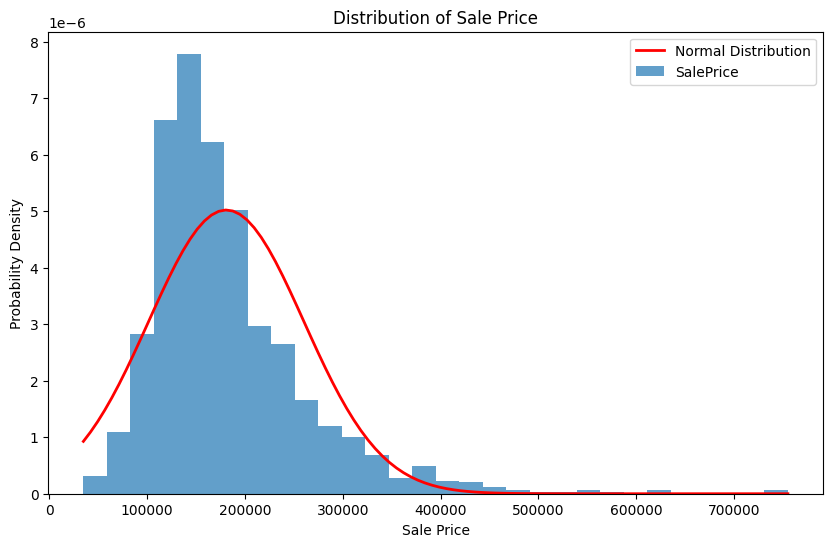

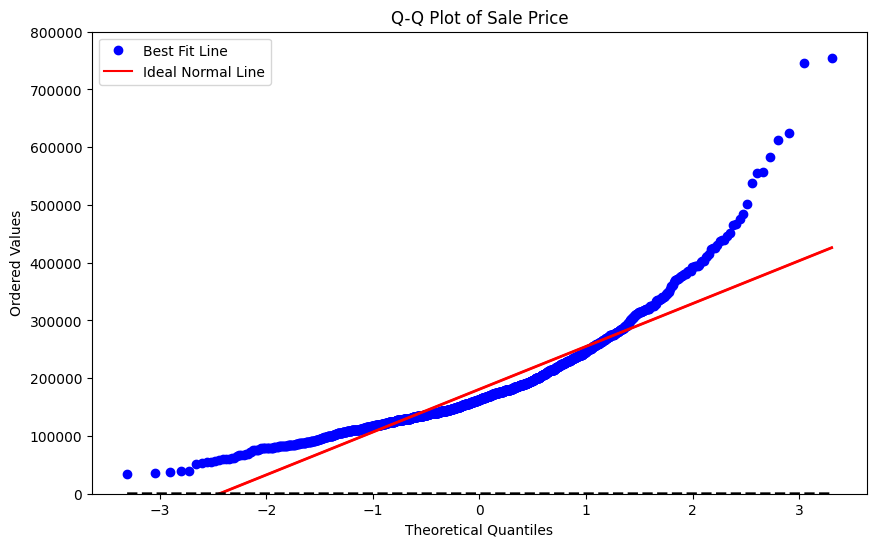

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Fit a normal distribution on SalePrice data
mu, sigma = stats.norm.fit(df_train['SalePrice'])

# Create a probability density histogram of SalePrice
plt.figure(figsize=(10, 6))
plt.hist(df_train['SalePrice'], bins=30, density=True, alpha=0.7)

# Calculate the normal distribution based on the fitted parameters
x = np.linspace(df_train['SalePrice'].min(), df_train['SalePrice'].max(), 100)
pdf = stats.norm.pdf(x, mu, sigma)

# Set up an overlay for the normal distribution
plt.plot(x, pdf, 'r-', linewidth=2)

# Set up layout for the plot
plt.xlabel('Sale Price')
plt.ylabel('Probability Density')
plt.title('Distribution of Sale Price')
plt.legend(['Normal Distribution', 'SalePrice'])

# Create a Q-Q plot
plt.figure(figsize=(10, 6))
res = stats.probplot(df_train['SalePrice'], dist='norm', plot=plt)

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = stats.linregress(res[0][0], res[0][1])
line = slope * res[0][0] + intercept

# Add the best fit line on a q-q plot
plt.plot(res[0][0], line, 'r-', linewidth=2)

# Update the q-q plot with a normal line
plt.plot(res[0][0], res[0][0], 'k--', linewidth=2)

# Set up layout for the q-q plot
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.title('Q-Q Plot of Sale Price')
plt.ylim(0, 800000)
plt.legend(['Best Fit Line', 'Ideal Normal Line'])

# Display the plots
plt.show()


It did it! That is awesome. While much of the code looks similar to the top 4's notebook, it is quite different in some of its approaches. I'll post the codeblock below for comparison.

In [16]:
import scipy.stats as stats
import plotly.graph_objects as go
import plotly.express as px

# Fit a normal distribution to the SalePrice data
mu, sigma = stats.norm.fit(df_train['SalePrice'])

# Create a histogram of the SalePrice column
hist_data = go.Histogram(x=df_train['SalePrice'], nbinsx=50, name="Histogram", opacity=0.75, histnorm='probability density', marker=dict(color='purple'))

# Calculate the normal distribution based on the fitted parameters
x_norm = np.linspace(df_train['SalePrice'].min(), df_train['SalePrice'].max(), 100)
y_norm = stats.norm.pdf(x_norm, mu, sigma)

# Create the normal distribution overlay
norm_data = go.Scatter(x=x_norm, y=y_norm, mode="lines", name=f"Normal dist. (μ={mu:.2f}, σ={sigma:.2f})", line=dict(color="green"))

# Combine the histogram and the overlay
fig = go.Figure(data=[hist_data, norm_data])

# Set the layout for the plot
fig.update_layout(
    title="SalePrice Distribution",
    xaxis_title="SalePrice",
    yaxis_title="Density",
    legend_title_text="Fitted Normal Distribution",
    plot_bgcolor='rgba(32, 32, 32, 1)',
    paper_bgcolor='rgba(32, 32, 32, 1)',
    font=dict(color='white')
)

# Create a Q-Q plot
qq_data = stats.probplot(df_train['SalePrice'], dist="norm")
qq_fig = px.scatter(x=qq_data[0][0], y=qq_data[0][1], labels={'x': 'Theoretical Quantiles', 'y': 'Ordered Values'}, color_discrete_sequence=["purple"])
qq_fig.update_layout(
    title="Q-Q plot",
    plot_bgcolor='rgba(32, 32, 32, 1)',
    paper_bgcolor='rgba(32, 32, 32, 1)',
    font=dict(color='white')
)

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = stats.linregress(qq_data[0][0], qq_data[0][1])
line_x = np.array(qq_data[0][0])
line_y = intercept + slope * line_x

# Add the line of best fit to the Q-Q plot
line_data = go.Scatter(x=line_x, y=line_y, mode="lines", name="Normal Line", line=dict(color="green"))

# Update the Q-Q plot with the normal line
qq_fig.add_trace(line_data)

# Show the plots
fig.show()
qq_fig.show()

It would be really cool if we could feed pictures into the prompt. No idea if any LLM is at the level to see this q-q plot, know that it doesn't make a good fit, and then write code to address it. Not my area of expertise by any means but considering all those points makes it seem unlikely to work (soon TM).

Anyway, the next step is to address the categorical/numerical splits and null values. This step wouldn't take but one code block to do normally but I'm curious to see how much we can use chatGPT.
In the essencse of my sanity and speed I'm going to address bullets 3-6. In all honesty, this is perfect chatGPT stuff. It really is boiler plate analysis, so lets see how much boiler plate we can remove in a prompt.

Prompt:
Referring back to bullet points 3, Feature Analysis, through 6, Outliers, can you write me code to explore each of those analyses?

    I kept it relatively vague to see how well it handles its memory and call backs for QoL, but with some specificity since there were multiple lists. It did give me some code on Feature Analysis, then Outliers, and then Correlation with Target variable. However, this isn't in the order presented in the list and it doesn't address the cats/nums split, nulls, and general outliers. It did give me some feature relationships and outliers on those features though. I'll go ahead and add the next few codeblocks from the output, but I'll need to copy the list from earlier and be much more specific.

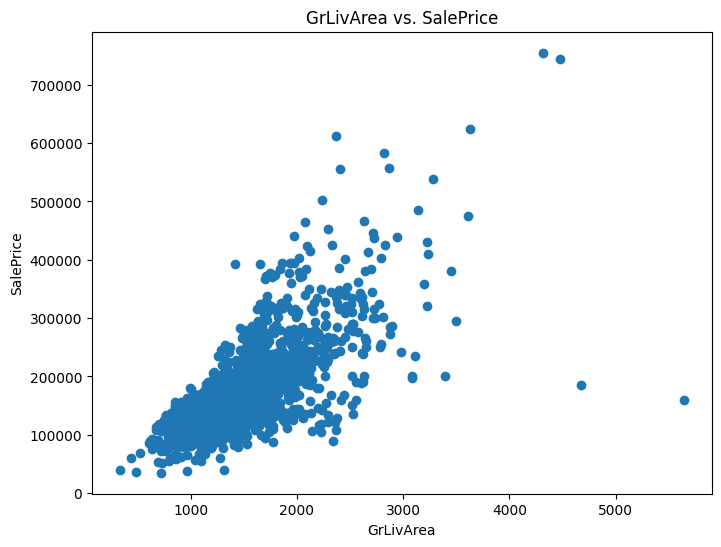

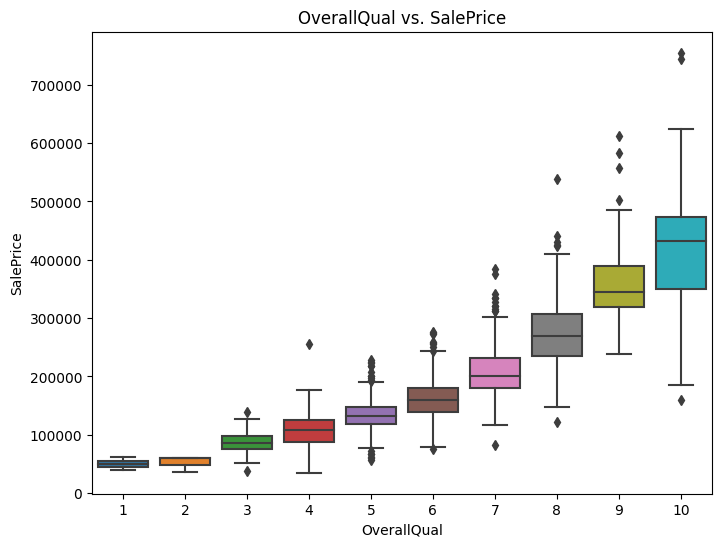

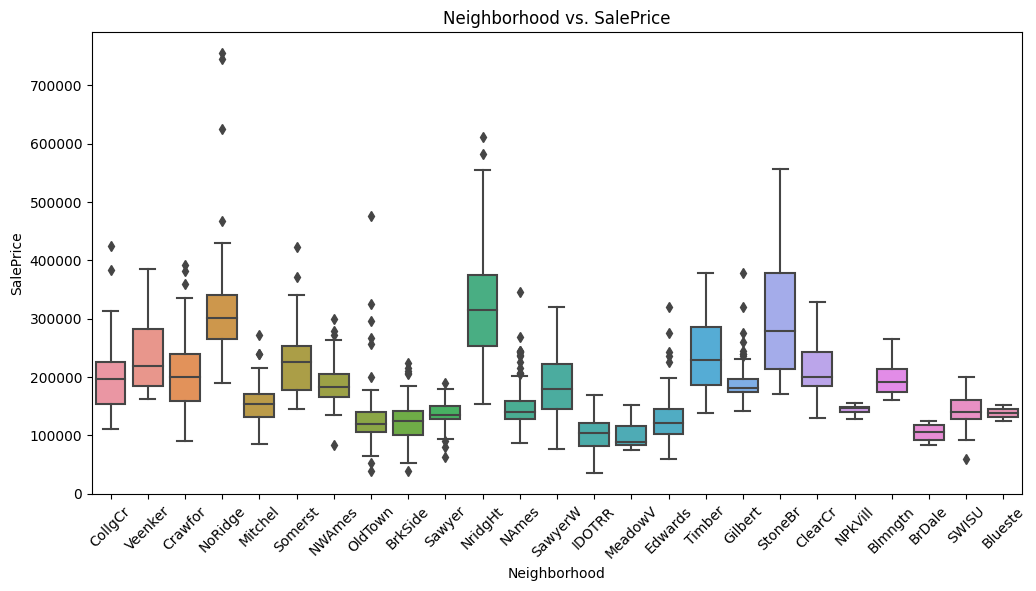

In [17]:
# Feature Analysis
# Scatter plot of GrLivArea vs. SalePrice
plt.figure(figsize=(8, 6))
plt.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('GrLivArea vs. SalePrice')
plt.show()

# Box plot of OverallQual vs. SalePrice
plt.figure(figsize=(8, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df_train)
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.title('OverallQual vs. SalePrice')
plt.show()

# Box plot of Neighborhood vs. SalePrice
plt.figure(figsize=(12, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df_train)
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice')
plt.title('Neighborhood vs. SalePrice')
plt.xticks(rotation=45)
plt.show()


We already have some of these plots, or at least similar plots from earlier. Then again, its not like it can actually see this notebook so I'll cut chatGPT some slack.

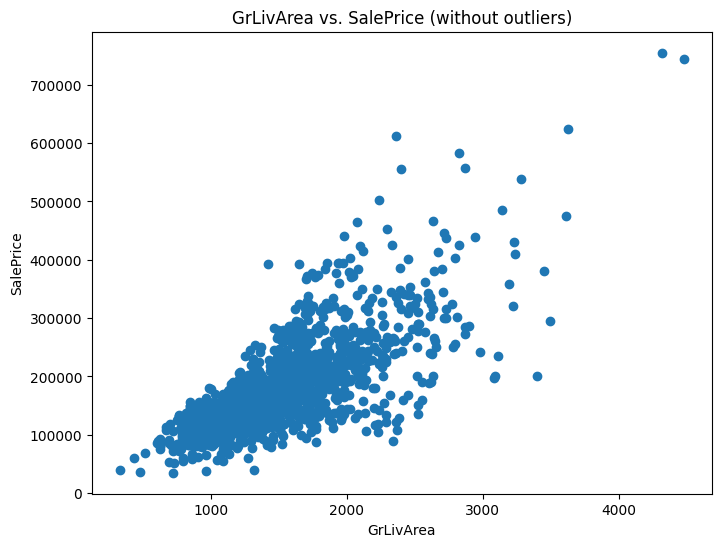

In [18]:
# Outliers
# Identify and remove outliers based on GrLivArea and SalePrice
df_train = df_train[(df_train['GrLivArea'] < 4000) | (df_train['SalePrice'] > 300000)]

# Replot the scatter plot without outliers
plt.figure(figsize=(8, 6))
plt.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('GrLivArea vs. SalePrice (without outliers)')
plt.show()


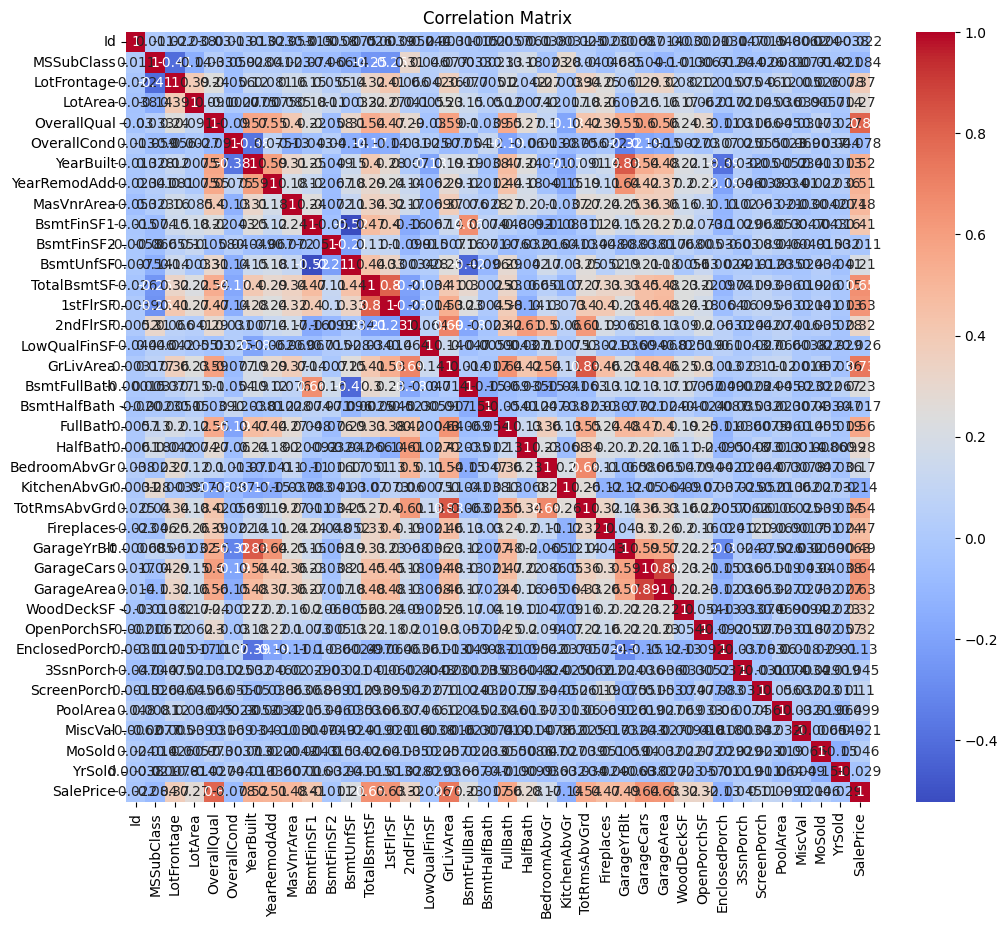

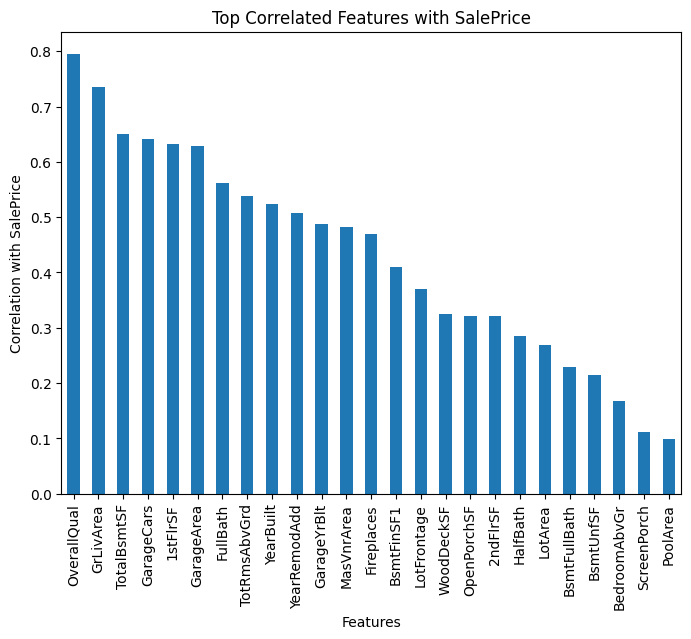

In [21]:
# Correlation with Target Variable
# Calculate correlation matrix
corr_matrix = df_train.select_dtypes(include=[np.number]).corr() # NOTE: This resulted in an error since cats are still in here, so I had to split it out for this codeblock to work

# Plot heatmap of correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Sort the correlation values with respect to SalePrice
corr_saleprice = corr_matrix['SalePrice'].sort_values(ascending=False)

# Bar plot of top correlated features with SalePrice
plt.figure(figsize=(8, 6))
corr_saleprice[1:26].plot(kind='bar') # NOTE: I ramped up the amount of features from 10 to 25
plt.xlabel('Features')
plt.ylabel('Correlation with SalePrice')
plt.title('Top Correlated Features with SalePrice')
plt.show()


<h5>hot damn thats a confusing matrix</h5>

Luckily it did add a sorted bar graph for most correlated columns. Realistically, this makes a lot sense. All of these things affect the price of a house so many of them are going to have some significant correlation.

Prompt:
This is a list you gave me earlier. Can you write code for bullet points 3, 4, 5, and 6?
1. **Data Overview**: Begin by loading the dataset and obtaining a high-level understanding of its structure. Explore the dimensions (number of rows and columns) of the dataset and review the available features (columns) and their data types.

2. **Target Variable**: In this case, the target variable is the "SalePrice" column. Examine its distribution to understand its range, skewness, and potential outliers. Plotting a histogram or a box plot can provide initial insights into the distribution of the target variable.

3. **Feature Analysis**: Explore each feature (column) in the dataset to understand its nature and relationship with the target variable. Consider the following:

   - **Numerical Features**: Analyze numerical features such as "GrLivArea," "LotArea," "OverallQual," etc. Examine their distributions, identify outliers, and check for any potential correlations with the target variable.
   
   - **Categorical Features**: Investigate categorical features like "MSZoning," "Neighborhood," "Exterior1st," etc. Evaluate their unique categories, frequency distributions, and potential impact on the target variable.
   
   - **Missing Values**: Identify any missing values in the dataset and determine the extent of missingness for each feature. Analyze the potential reasons behind missing values and decide how to handle them in subsequent steps.

4. **Correlations**: Calculate the correlation between the numerical features and the target variable. Identify features that have a strong positive or negative correlation, as they may be good predictors of the target variable. Visualize the correlations using a correlation matrix or a heatmap.

5. **Feature Relationships**: Examine the relationships between different features. Look for potential correlations or dependencies between features that can aid in feature selection or engineering. Scatter plots, pair plots, or other visualizations can be helpful for this analysis.

6. **Outliers**: Identify any outliers in the dataset. Determine whether these outliers are erroneous data points or represent genuine observations. Depending on the nature of the outliers, decide whether to remove or transform them.

7. **Data Preprocessing**: Based on your analysis, determine the appropriate preprocessing steps for the dataset. This may include handling missing values, encoding categorical variables, scaling numerical features, or applying transformations to skewed data.

    Let us see. It did better but it locked numerics = ['GrLivArea', 'LotArea', 'OverallQual'] and cats = ['MSZoning', 'Neighborhood', 'Exterior1st']. Uhhhh I'm going to ask it to rewrite that but expand numerical_features and cats to all nums and cats.

Prompt:
Can you rewrite that code to contain all numerical data in the dataset as well as all categorical data in the dataset?

    Interesting. It did fix it correctly, but it didn't rewrite any of the other codeblocks. I'll ask it one last time to rewrite the subsequent blocks with consideration of the new block. After that I'm just going to make changes myself

Prompt:
Thanks, can you also rewrite the changes to reflect in the correlations,  feature relationships, and outliers code blocks?

    I lied, I want it to fix a crucial step in the correlation segment. So I'm going to ask it to fix it because you can't run corr on the cats.

Prompt:
Almost there, can you fix the correlation segment. We cannot run .corr() on since it will return this error: ValueError: could not convert string to float: 'RL'

    Superb. I'll add in the blocks below. HOLY MOTHER OF GRAPHS. I'm going to ask it this next prompt. Hopefully it work, we just need to save these graphs to a folder.

Prompt:
Awesome, thanks! Can you rewrite the following code to save the graph outputs to a folder named Visualizations? [code with cat/num splits and nulls]

    We can look at the pretty graphs in the folder. I probably should have named it something more specific to what these graphs are. For now I'll change it myself. I don't want all visuals to go there. I created a folder inside of Visualizations named Cats_Nums_Nulls-Analysis
    Looks like there are a lot of missing values as shown in the missing_values.png. I'll go ahead and codea  block to see that in a notebook output.
    I asked the same graph to folder prompt for the outlier graphs.

Prompt:
Can you rewrite this code to send all graph outputs to a folder in a folder? The path is Visualizations/Outliers. [the corr, feature relationships, and outliers code]

    This code block takes awhile. Break time.



In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Create Visualizations folder if it doesn't exist
visualization_folder = "Visualizations"
if not os.path.exists(visualization_folder):
    os.makedirs(visualization_folder)

# Numerical Features
numerical_features = df_train.select_dtypes(include=['int64', 'float64']).columns

# Histograms of numerical features
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_train[feature], kde=True)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'{feature} Distribution')
    plt.savefig(f'{visualization_folder}/{feature}_distribution.png')
    plt.close()

# Categorical Features
categorical_features = df_train.select_dtypes(include='object').columns

# Count plots of categorical features
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=df_train)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'{feature} Frequency')
    plt.xticks(rotation=45)
    plt.savefig(f'{visualization_folder}/{feature}_frequency.png')
    plt.close()

# Missing Values
missing_values = df_train.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_percentage = (missing_values / len(df_train)) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_percentage)
plt.xlabel('Features')
plt.ylabel('Missing Percentage')
plt.title('Missing Values')
plt.xticks(rotation=45)
plt.savefig(f'{visualization_folder}/missing_values.png')
plt.close()


In [28]:
display_scrollable_table(missing_values.to_frame(), 'Null counts')
display_scrollable_table(missing_percentage.to_frame(), 'Null percents')

,0
PoolQC,1452
MiscFeature,1404
Alley,1367
Fence,1177
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81


,0
PoolQC,99.588477
MiscFeature,96.296296
Alley,93.758573
Fence,80.727023
MasVnrType,59.807956
FireplaceQu,47.325103
LotFrontage,17.764060
GarageType,5.555556
GarageYrBlt,5.555556
GarageFinish,5.555556


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Create Visualizations/Outliers folder if it doesn't exist
outliers_folder = "Visualizations/Outliers"
if not os.path.exists(outliers_folder):
    os.makedirs(outliers_folder)

# Numerical Features
# numerical_features = df_train.select_dtypes(include=['int64', 'float64']).columns # NOTE: this isn't needed since we already have it, but it shows that chatGPT fixed its mistake

# Correlations
correlation_matrix = df_train[numerical_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig(f'{outliers_folder}/correlation_matrix.png')
plt.close()

# Feature Relationships
sns.pairplot(df_train[numerical_features])
plt.savefig(f'{outliers_folder}/feature_relationships.png')
plt.close()

# Outliers # NOTE: this could probably be deleted if you aren't interested. This part takes A WHILE!
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_train[feature])
    plt.xlabel(feature)
    plt.title(f'{feature} Outliers')
    plt.savefig(f'{outliers_folder}/{feature}_outliers.png')
    plt.close()


A crapton of graphs, some are really useful. But I think for simplicity's sake the bar graph from earlier showing highest correlations are good enough. We can iterate on better scores via outlier analysis later. For now lets move on.